In [1]:
import main
import numpy as np
import pandas as pd

In [2]:
import plotly.graph_objects as go
from color import colors20

def network_plot(x, y, labels, selected_indices=None, label_names=None, line_x=None, line_y=None, colors=colors20, width=600, height=600):
    fig = go.Figure()
    
    if (line_x is not None) and (line_y is not None):
        fig.add_trace(go.Scatter(x=line_x, y=line_y, mode="lines", line=dict(color="#888888", width=0.1)))
    
    for label in np.unique(labels):
        fig.add_trace(
            go.Scatter(
                x=x[labels == label],
                y=y[labels == label],
                mode="markers",
                marker=dict(
                    size=5,
                    color=colors[label],
                    line=dict(width=0.5, color="#aaaaaa"),
                ),
                name=(
                    label_names[label]
                    if label_names is not None
                    else f"Group {label+1}  "  # NOTE: adding space for nicer placing
                ),
            )
        )
    
    if selected_indices is not None:
        fig.add_trace(
            go.Scatter(
                x=x[selected_indices],
                y=y[selected_indices],
                mode="markers",
                marker=dict(
                    size=8,
                    color="rgba(255, 255, 255, 0.0)",
                    line=dict(width=1.5, color="#0500F7"),
                )
            )
        )

    fig.update_layout(
        autosize=False,
        width=width,
        height=height,
        plot_bgcolor="#ffffff",
        xaxis=dict(
            showticklabels=False, showgrid=False, showline=False, zeroline=False
        ),
        yaxis=dict(
            showticklabels=False, showgrid=False, showline=False, zeroline=False
        ),
        coloraxis=dict(colorbar=dict(title="Color Index")),
        margin=dict(t=0, b=0, l=0, r=0),
        legend=dict(
            font=dict(size=10),
            x=1,
            y=1,
            xanchor="right",
            yanchor="top",
            bordercolor="#cccccc",
            borderwidth=1,
        ),
        dragmode="lasso"
    )

    return fig

In [3]:
X = np.load("../data/highschool_2012/tensor.npy")

label_df = pd.read_csv("../data/highschool_2012/instance_labels.csv")
y_inst = np.array(label_df["label"])
y_inst_names = np.array(label_df.groupby("label")["label_name"].first())

time_names = pd.read_csv("../data/highschool_2012/times.csv")["check_time"]
var_names = pd.read_csv("../data/highschool_2012/variables.csv")["name"]

ys = [None, y_inst, None]
y_names_list = [None, y_inst_names, None]
element_names_list = [time_names, None, var_names]

app = main.init_app(
    X,
    ys,
    y_names_list=y_names_list,
    element_names_list=element_names_list,
    default_target_mode=1,  # 0: time, 1: instance, 2: varible
    default_n_components_list=np.array([5, 10, 3]),
    show_aux_view=False
)
        
app.run(debug=False, jupyter_height=750, jupyter_width=1100)

In [4]:
# get selected indices from the above UI's scatterplot
selected_indices = main.states["selected_indices"]
print(selected_indices)

[  0   1   7  11  14  21  23  24  25  27  29  30  34  37  40  42  45  46
  47  49  52  53  60  61  62  65  68  70  71  73  74  83 145 102]


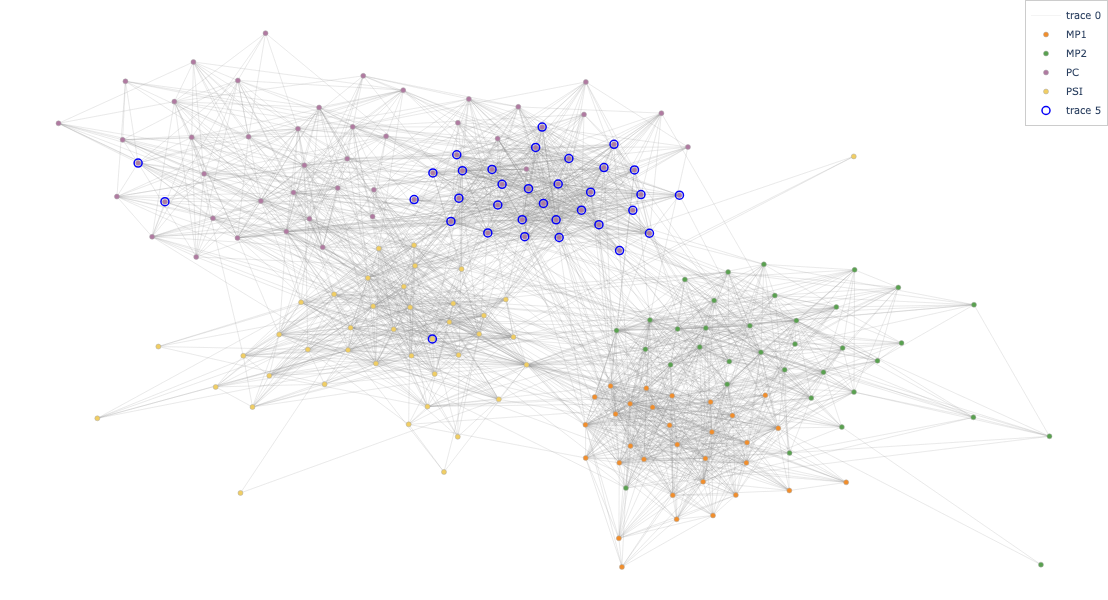

In [5]:
import json

instances = pd.read_csv("../data/highschool_2012/instances.csv")

line_x = None
line_y = None
for self_x, self_y, targets in zip(instances["x"], instances["y"], instances["targets"]):
    xs = instances["x"][np.array(json.loads(targets), dtype=int)]
    ys = instances["y"][np.array(json.loads(targets), dtype=int)]
    xs = np.array([[self_x, x, None] for x in xs]).flatten()
    ys = np.array([[self_y, y, None] for y in ys]).flatten()
    if line_x is None:
        line_x = xs
        line_y = ys
    else:
        line_x = np.hstack((line_x, xs))
        line_y = np.hstack((line_y, ys))    

fig = network_plot(instances["x"], instances["y"], labels=y_inst, selected_indices=selected_indices, line_x=line_x, line_y=line_y, label_names=y_inst_names)

fig.show()